In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

#### Load and check data

In [167]:
df = pd.read_csv('./spam_ham_dataset.csv')

In [168]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


#### Let's look at the number of our targets

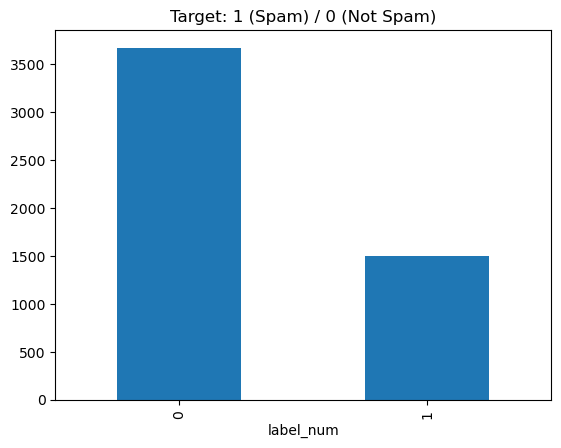

In [178]:
df['label_num'].value_counts().plot(kind='bar', title="Target: 1 (Spam) / 0 (Not Spam)");

#### Drop useless columns

In [113]:
df.drop(columns=['label', 'Unnamed: 0'], inplace=True, axis=1)

In [114]:
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


#### Remove constant word from the dataset

In [115]:
df['text'] = df['text'].str.removeprefix("Subject: ")

In [116]:
df.head()

,text,label_num
0,enron methanol ; meter # : 988291\r\nthis is a...,0
1,"hpl nom for january 9 , 2001\r\n( see attached...",0
2,"neon retreat\r\nho ho ho , we ' re around to t...",0
3,"photoshop , windows , office . cheap . main tr...",1
4,re : indian springs\r\nthis deal is to book th...,0


#### Remove all punctuation marks and line break characters from dataset and lowercase it

In [117]:
df["text"] = df["text"].str.replace(r'[^\w\s]', "", regex=True).str.replace("\r\n", " ").str.lower()

In [118]:
df

,text,label_num
0,enron methanol meter 988291 this is a follo...,0
1,hpl nom for january 9 2001 see attached file...,0
2,neon retreat ho ho ho we re around to that m...,0
3,photoshop windows office cheap main trendi...,1
4,re indian springs this deal is to book the te...,0
...,...,...
5166,put the 10 on the ft the transport volumes dec...,0
5167,3 4 2000 and following noms hpl can t take ...,0
5168,calpine daily gas nomination julie as i men...,0
5169,industrial worksheets for august 2000 activity...,0


#### Make X and y dataset

In [153]:
X = df['text'].to_numpy()
y = df['label_num'].to_numpy()

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle= True)

#### Convert str to vectors

In [155]:
Vectorizer = CountVectorizer()
X_train = np.array(Vectorizer.fit_transform(X_train).todense())
X_test = np.array(Vectorizer.transform(X_test).todense())

#### Now let's define Mulitnominal Naive Bayes

In [ ]:
class MultNB:
    def fit(self, X, y):

        self.classes, self.cls_counts = np.unique(y, return_counts=True)
        self.priors = self.cls_counts / len(y)  # P(A)

        self.target = np.array(
            [np.sum(X[y == c], axis=0) for c in range(len(self.classes))]
        )

        self.eps = 1e-3
        self.probs = np.array(
            [
                (self.target[i] + self.eps)
                / (np.sum(self.target[i]) + self.eps * X.shape[-1])
                for i in range(len(self.classes))
            ]
        )  # P(B | A)

        self.log_priors = np.log(self.priors)  # log(P(A))
        self.log_probs = np.log(self.probs)  # log(P(B | A))

    def predict(self, X):
        log_likelihoods = X.dot(self.log_probs.T) # log(P(B | A))
        posterior = log_likelihoods + self.log_priors # log(P(A | B)) 
        return np.argmax(posterior, axis=1)  # argmax(log(P(A | B)))

#### Train and predict test data

In [372]:
model = MultNB()

model.fit(X_train, y_train)
preds = model.predict(X_test)
accuracy_score(y_test, preds)

0.9710144927536232

### As we can see the naive Bayesian classifier shows excellent results with its simple implementation, fast training speed and predictions. In addition, it is robust to noise and outliers 

### But this algorithm has several disadvantages:
#### If the signs are dependent, the accuracy of our predictions will be noticeably worse.
#### Also, if there is an imbalance of classes, it will prioritize the larger of them